In [1]:
pwd


'/content'

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ns
data=pd.read_csv(r'/content/sample_data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [218]:
data.shape

(13320, 9)

In [219]:
data.isnull().mean()*100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


In [220]:
data['area_type'].value_counts()


,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [221]:
data.drop(columns=["availability","area_type","society","balcony"],axis=1,inplace=True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [222]:
data.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [223]:
data.dropna(inplace=True)
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [224]:
data.shape

(13246, 5)

In [226]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [227]:

data['bhk']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [228]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [125]:
data.drop(columns=['size'],axis=1,inplace=True)

In [229]:
data.shape

(13246, 6)

In [230]:
data[data.bhk>22]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [231]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [232]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [233]:
data[data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [234]:
def convert_sqrt_into_number(x):
  token=x.split('-')
  if len(token)==2:
    return(float(token[0])==float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [235]:
df1=data.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqrt_into_number)
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [236]:
df2=df1.copy()

In [237]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [238]:
df2.location=df2.location.apply(lambda x: x.strip())
location_stats=df2['location'].value_counts(ascending=False)
location_stats

,count
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [239]:
len(location_stats[location_stats<=10])

1052

In [240]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
Naganathapura,10
Sadashiva Nagar,10
Nagappa Reddy Layout,10
BTM 1st Stage,10
Sector 1 HSR Layout,10
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [241]:
df2.location=df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

242

In [242]:
df2.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [243]:
df2[ (df2.total_sqft/df2.bhk<300) ].head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,3.627451e+04
30,Yelahanka,4 BHK,0.0,4.0,186.0,4,inf
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3.333333e+04
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1.066098e+04
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6.296296e+03


In [244]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12358, 7)

In [245]:
df3.price_per_sqft.describe()

,price_per_sqft
count,12312.000000
mean,6323.403514
std,4187.211055
min,267.829813
25%,4208.545855
50%,5300.000000
75%,6938.987948
max,176470.588235


In [246]:
def remove_outlier_from_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key, sub in df.groupby('location'):
        m = np.mean(sub.price_per_sqft)
        st = np.std(sub.price_per_sqft)
        replace_df = sub[(sub.price_per_sqft > (m - st)) & (sub.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, replace_df], ignore_index=True)
    return df_out

df4 = remove_outlier_from_price_per_sqft(df3)
print(df4.shape)


(10140, 7)


In [247]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


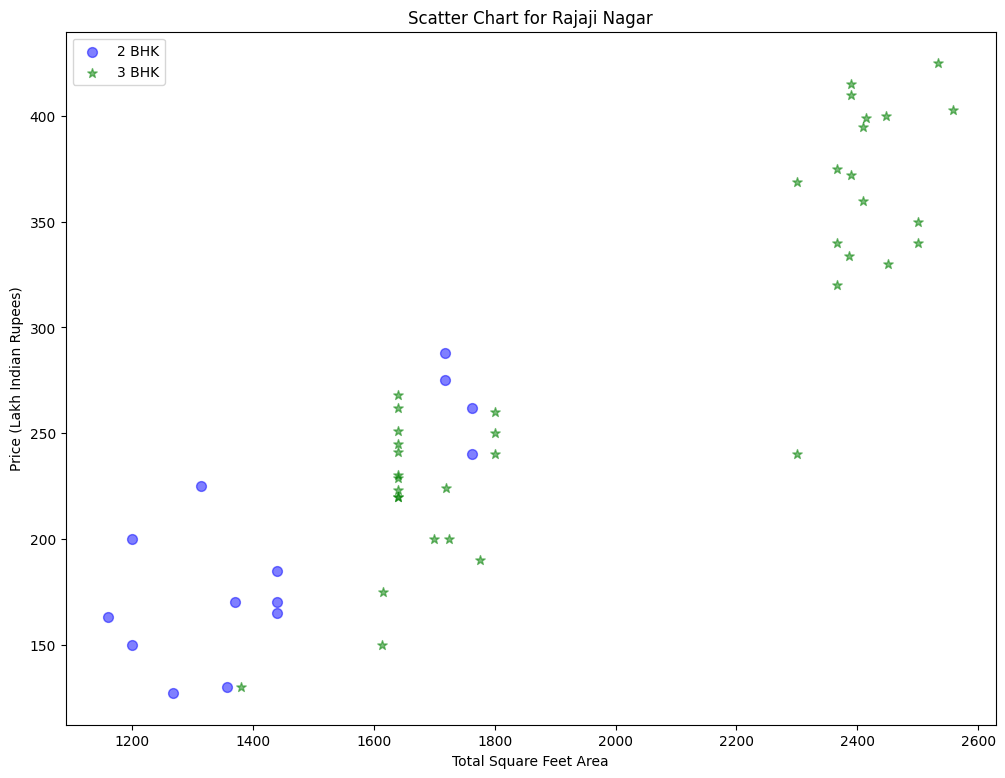

In [248]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (12, 9)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', alpha=0.5, s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='*', color='green', label='3 BHK', alpha=0.5, s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(f"Scatter Chart for {location}")
    plt.legend()
    plt.show()

plot_scatter_chart(df4, "Rajaji Nagar")

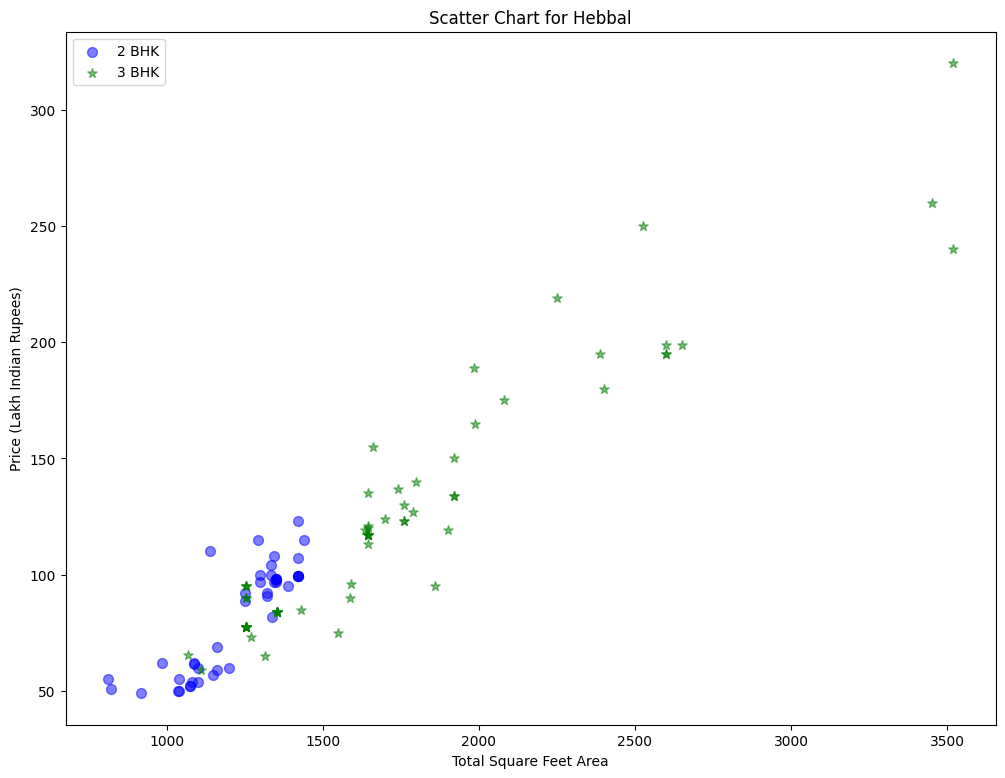

In [249]:
plot_scatter_chart(df4,'Hebbal')

In [250]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [251]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5221,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8388,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8477,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9210,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


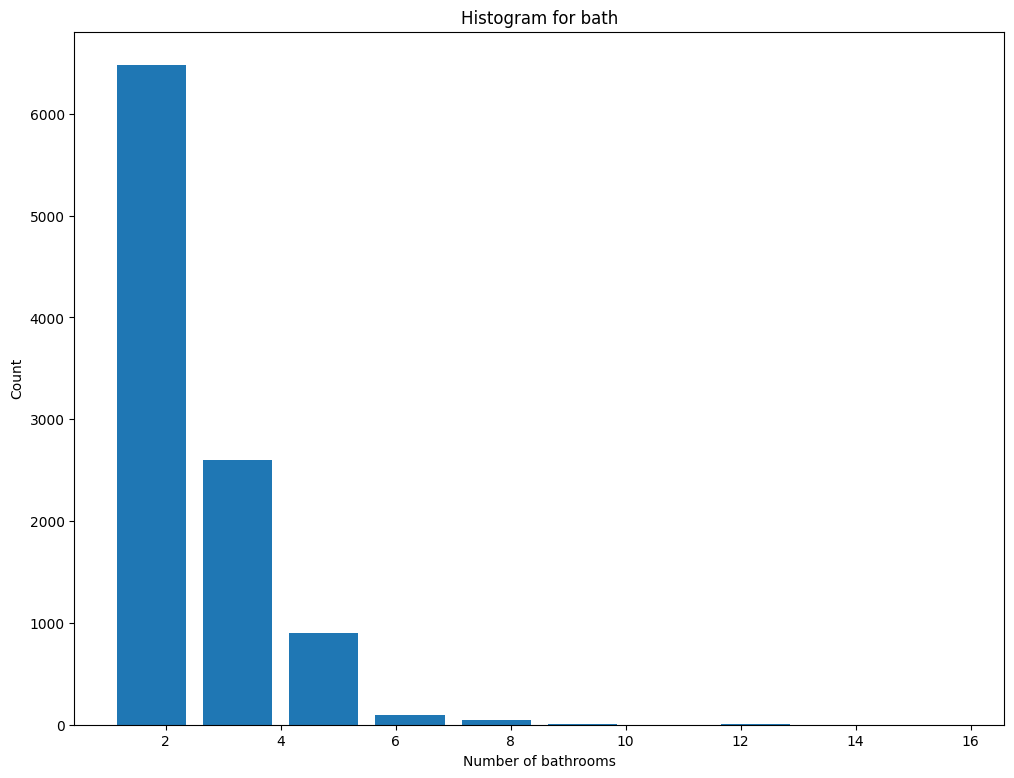

In [252]:
plt.hist(df4.bath,rwidth=0.8)
plt.title("Histogram for bath")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

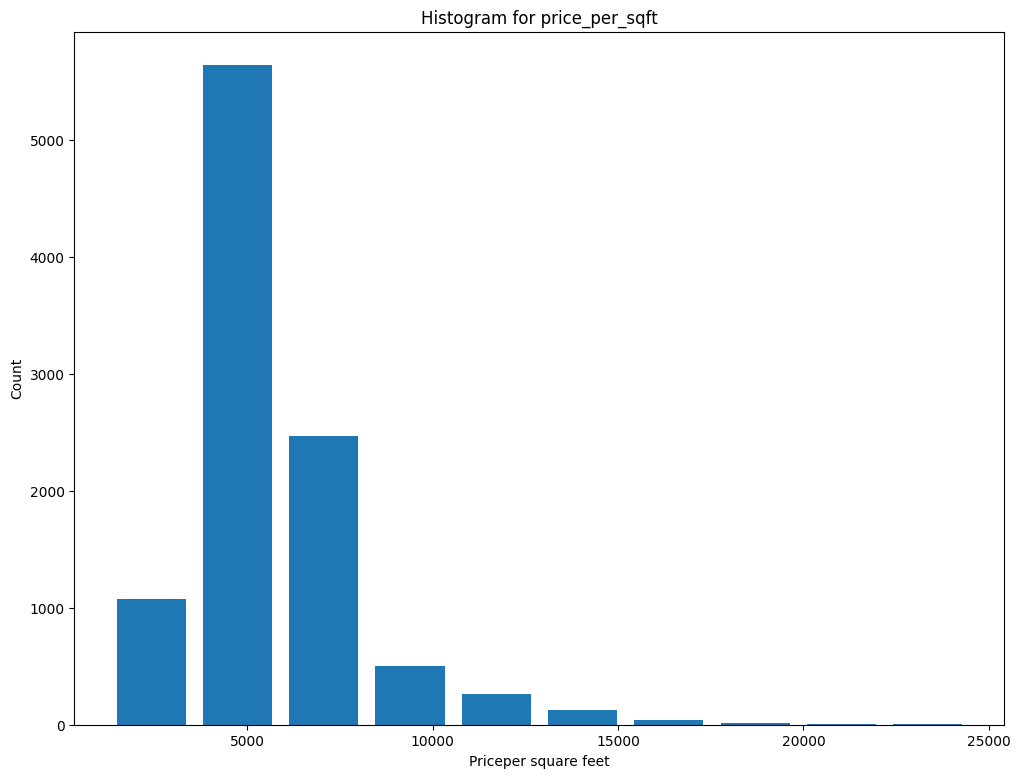

In [253]:
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.title("Histogram for price_per_sqft")
plt.xlabel("Priceper square feet")
plt.ylabel("Count")
plt.show()

In [254]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5221,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8388,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8477,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9210,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [255]:
df4[df4.bath>df4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5182,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6639,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8313,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [256]:
df4=df4[~(df4.bath>df4.bhk+2)]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [257]:
df4.shape

(10136, 7)

In [258]:
df4=df4.drop(['price_per_sqft'],axis='columns')
df4.head()

,location,size,total_sqft,bath,price,bhk
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2


In [259]:
dummies=pd.get_dummies(df4.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [262]:
df5=pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df5.head(3)

,location,size,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [263]:
df5.drop('location',axis='columns',inplace=True)
df5.head()

,size,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3 BHK,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 BHK,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2 BHK,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
df5.shape

(10136, 246)

In [265]:
x=df5.drop('price',axis=1)
y=df5['price']

In [266]:
x.shape

(10136, 245)

In [267]:
y.shape

(10136,)

In [268]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=42)


In [270]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9933, 245), (203, 245), (9933,), (203,))

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [276]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

lr = LinearRegression()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('lr', lr)])
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(score)


0.7173111494277914


In [279]:
predictions = pipe.predict(X_test.head())
print(predictions)

[ 46.7073682   14.66257259  72.66184718  51.97505743 162.00158573]


In [280]:
y_test

,price
7663,37.62
4354,18.00
5174,135.00
2376,48.50
6684,150.00
...,...
7831,64.08
4958,100.00
9303,75.00
39,225.00


In [297]:
def predict_price(location, sqft, bath, bhk):
    X = df  # Define X as your dataframe or feature matrix
    loc_index = np.where(X.columns == location)[0]
    X=np.zeros(27)  # Initialize X with 27 zeros
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index>=0:
        X[loc_index]=1
    X = X.reshape(1, 27)  # Reshape X to have 27 features
    return lr.predict(X)[0]

predict_price('1st Phase JP Nagar',1000, 2, 2)

<ipython-input-297-77b4f6651f8f>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index>=0:


65663.30074892861

In [293]:
predict_price('Indira Nagar',1400,2,3)

<ipython-input-292-6389dd8068a7>:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index>=0:


91866.99224789611